<a href="https://colab.research.google.com/github/aishah0/parkinsons-project-data/blob/main/Parkinson's_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parkinson’s Disease Early Detection – Analysis Notebook

### Objective
This project aims to identify the strongest risk factors and early indicators of Parkinson’s Disease using a dataset containing demographic, lifestyle, clinical, and neurological variables.

### Load and Explore Dataset


In [76]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

###1. Importing and previewing our data

In [77]:
url = 'https://raw.githubusercontent.com/aishah0/parkinsons-project-data/refs/heads/main/parkinsons_disease_data.csv'
df = pd.read_csv(url)
df.head()


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,Depression,Stroke,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,9.283194,0,0,0,0,0,0,129,60,222.842278,148.125623,37.867776,337.307114,6.458713,29.181289,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,5.602470,0,0,0,0,0,0,163,76,210.501133,153.756463,77.228117,264.635521,37.306703,12.332639,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,9.929824,0,0,0,1,0,0,113,93,287.387996,118.702600,85.588304,395.662649,67.838170,29.927783,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,4.196189,0,0,0,0,0,0,146,78,280.339546,136.299186,51.869626,362.189688,52.964696,21.304268,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,9.363925,0,0,0,0,0,0,115,94,284.014151,108.449452,25.069418,149.956586,21.804880,8.336364,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid


### 2. Data Cleaning


#### a. Checking for missing values

In [78]:
df.info()         # Shows column types, null counts
df.describe()     # Summary stats for numeric columns
df.isnull().sum() # Total missing values per column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PatientID                 2105 non-null   int64  
 1   Age                       2105 non-null   int64  
 2   Gender                    2105 non-null   int64  
 3   Ethnicity                 2105 non-null   int64  
 4   EducationLevel            2105 non-null   int64  
 5   BMI                       2105 non-null   float64
 6   Smoking                   2105 non-null   int64  
 7   AlcoholConsumption        2105 non-null   float64
 8   PhysicalActivity          2105 non-null   float64
 9   DietQuality               2105 non-null   float64
 10  SleepQuality              2105 non-null   float64
 11  FamilyHistoryParkinsons   2105 non-null   int64  
 12  TraumaticBrainInjury      2105 non-null   int64  
 13  Hypertension              2105 non-null   int64  
 14  Diabetes

,0
PatientID,0
Age,0
Gender,0
Ethnicity,0
EducationLevel,0
BMI,0
Smoking,0
AlcoholConsumption,0
PhysicalActivity,0
DietQuality,0


As shown above, there are no missing values.

#### b. Handling non-numeric columns

We recognize that any non-numeric columns in our dataset need to be encoded. In other words, these variables need to be converted into a numerical format to allow our machine learning model understand and work with this data.

After examining our dataset for non-numerical values, we realized the only column containing non-numeric data was `DoctorInCharge`. However, this column contains identifiers and does not contribute to predicting Parkinson's Disease. Including it would add noise and potentially introduce bias if the same doctor sees specific types of patients.

Therefore, we drop it in to focus only on meaningful and predictive features, as shown in the code cell below. Afterwards, we check that all remaining columns are numeric and ready for modeling.

**Note:also explain why PatientID was dropped**




In [79]:

#dropping DoctorInCharge
df.drop(columns=['DoctorInCharge'], inplace=True)
df.drop(columns=['PatientID'], inplace=True)

#checking to ensure remaining columns are numeric
df.dtypes.value_counts()

,count
int64,21
float64,12


The output above shows that the dataset contains 22 `int64` (integer) columns and 12 `float64` (decimal) columns. This confirms that all features in the dataset are numeric and that categorical and non-predictive features (such as `DoctorInCharge`) have been successfully removed.

####c. Encoding

Next, we examine our categorical variables and determine which ones need encoding. We recognize that not all categorical variables should be treated the same. Some require one-hot encoding, while others are better handled with label encoding or left as-is depending on their structure and meaning. Label encoding can be risky for unordered categories (categories without a clear order, e.g. race) , since the model may think the values have meaning. We need to treat each variable type appropriately. Below is our reasoning behind whether or not each category requires encoding:

**Gender**
- Originally uses label encoding. It is a binary categorical variable with values 0 (Male) and 1 (Female).
- The label encoding used is sufficient since the values do not imply any ordinal relationship and the binary structure is already ideal. No further encoding is necessary.

**Ethnicity**
- Is originally a nominal variable (Caucasian, African American, Asian, Other)stored as numeric codes 0–3. However, these numbers are label-encoded, which wrongly suggests a ranked relationship (e.g., that 3 > 1).
- We apply one-hot encoding to replace the existing numeric codes with binary dummy variables for each category. This allows the model to treat each ethnicity independently, without assuming any ordinal relationship.

**EducationLevel**
- This is an ordinal categorical variable, where 0 = None, 1 = High School, 2 = Bachelor's, and 3 = Higher.
- These categories follow a natural progression in educational attainment, so label encoding is appropriate here because the order carries meaningful information that the model can learn from. No further encoding is necessary.

**Other Binary Categorical Variables** (0 = No, 1 = Yes)
- Variables like `Smoking`, `Depression`, `FamilyHistoryParkinsons`, `Stroke`, `Tremor`, `Constipation`, etc. are origially numerical and binary (0 or 1).
- No further encoding is necessary since the values already represent clear binary categories suitable for modeling.

**Continuous Variables**
- All other columns, such as `Age`, `BMI`, `SleepScore`, `MoCA`, `UPDRS`, `Cholesterol`, etc., are originally numeric and and continuous.
- No further encoding is necessary. These values need to be kept in their original form to preserve the granularity needed for effective prediction.


Thus, the only variable we have decided to encode is `Ethnicity`. This variable has four categories with no natural order, so we apply one-hot encoding to remove any implied ordinal relationship.

The code in the cell below creates a separate binary variable for each ethnicity, allowing the model to treat each group independently.


In [80]:
#creating columns for each ethnicity
df = pd.get_dummies(df, columns=['Ethnicity'], prefix='Ethnicity', drop_first=False)

# Renaming columns for clarity
df.rename(columns={
    'Ethnicity_0': 'Ethnicity_Caucasian',
    'Ethnicity_1': 'Ethnicity_AfricanAmerican',
    'Ethnicity_2': 'Ethnicity_Asian',
    'Ethnicity_3': 'Ethnicity_Other'
}, inplace=True)

df.filter(like='Ethnicity').head()

,Ethnicity_Caucasian,Ethnicity_AfricanAmerican,Ethnicity_Asian,Ethnicity_Other
0,False,False,False,True
1,True,False,False,False
2,True,False,False,False
3,True,False,False,False
4,True,False,False,False


After one-hot encoding the `ethnicity` variable into four separate columns, we converted the resulting boolean values (`True`/`False`) to binary integers (`1`/`0`). This step ensures consistency across the dataset, as all other binary variables (e.g., `Diagnosis`, `Smoking`) are also represented as 0 or 1. The uniform format should improve clarity during statistical analysis, visualization, and model training.

In [81]:
#converting from boolean to integer values
ethnicity_cols = ['Ethnicity_Caucasian', 'Ethnicity_AfricanAmerican', 'Ethnicity_Asian', 'Ethnicity_Other']
df[ethnicity_cols] = df[ethnicity_cols].astype(int)
df.filter(like='Ethnicity').head()

,Ethnicity_Caucasian,Ethnicity_AfricanAmerican,Ethnicity_Asian,Ethnicity_Other
0,0,0,0,1
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


####d. Outlier Detection

We inspect for outliers using statistical IQR methods. The selected features were assessed for values falling beyond 1.5×IQR from the quartiles. The code cell below exemplifies the process with the UPDRS feature, and shows the result (no outliers were detected). The same code was used to test the following features:
- Age
- BMI
- *list the rest*

None of the features contained outliers.

In [82]:
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# 📌 Check for outliers in UPDRS
updrs_outliers = find_outliers_iqr(df, 'UPDRS')
print(f"Number of UPDRS outliers: {len(updrs_outliers)}")

Number of UPDRS outliers: 0


###3. Feature Engineering

####a. Interaction Terms

Based on the hypothesis that poor sleep and depression combined might be a stronger indicator of Parkinson's than either alone, we engineer an interaction between Sleep Quality and Depression.

In [83]:
# creating interaction term of SleepQuality × Depression
df['SleepDepressionInteraction'] = df['SleepQuality'] * df['Depression']

####b. Composite Indices
We also engineer Cardiometabolic Risk Index as a composite index aggregating BMI, diabetes status, and total cholesterol to reflect cardiometabolic burden.

Additionally, we engineer Neuropsychiatric Burden Index, which combines depression status and reversed sleep quality score, with lower sleep quality contributing to higher neuropsychiatric burden.



In [84]:
# Cardiometabolic Risk Index
df['CardiometabolicRisk'] = df['BMI'] + df['Diabetes'] + df['CholesterolTotal']

#Neuropsychiatric Burden Index, where lower sleep = higher burden
df['NeuropsychiatricBurden'] = df['Depression'] + (10 - df['SleepQuality'])

####c. Binning variables

UPDRS (Unified Parkinson's Disease Rating Scale) ranges from 0–199. We engineered a binned version of the UPDRS score, grouping patients into early-stage (0) and advanced-stage (1) Parkinson’s based on clinical severity cutoffs.

In the code cell below, we create a new column that categorizes patients into:

0: Early Stage (0–80)
1: Advanced Stage (81–199)

In [85]:
# binning UPDRS scores into early vs. advanced stage
df['PD_Stage'] = pd.cut(df['UPDRS'], bins=[-1, 80, 200], labels=[0, 1]).astype(int)


The table below displays a subset of the dataset with the newly created engineered features. This helps validate that calculations and transformations were applied correctly before proceeding with analysis and modeling.

In [86]:
# previewing the new engineered columns
df[['SleepQuality', 'Depression', 'SleepDepressionInteraction',
    'BMI', 'Diabetes', 'CholesterolTotal', 'CardiometabolicRisk',
    'NeuropsychiatricBurden', 'UPDRS', 'PD_Stage']].head(10)

,SleepQuality,Depression,SleepDepressionInteraction,BMI,Diabetes,CholesterolTotal,CardiometabolicRisk,NeuropsychiatricBurden,UPDRS,PD_Stage
0,9.283194,0,0.00000,19.619878,0,222.842278,242.462156,0.716806,6.458713,0
1,5.602470,0,0.00000,16.247339,0,210.501133,226.748472,4.397530,37.306703,0
2,9.929824,0,0.00000,15.368239,1,287.387996,303.756234,0.070176,67.838170,0
3,4.196189,0,0.00000,15.454557,0,280.339546,295.794103,5.803811,52.964696,0
4,9.363925,0,0.00000,18.616042,0,284.014151,302.630193,0.636075,21.804880,0
5,7.737549,0,0.00000,39.423311,0,290.133122,329.556434,2.262451,101.912536,1
6,5.981984,0,0.00000,30.542003,0,283.503014,314.045017,4.018016,37.453720,0
7,7.895866,0,0.00000,36.758282,1,185.203703,222.961985,2.104134,181.172565,1
8,4.170470,0,0.00000,22.380587,1,274.970149,298.350735,5.829530,178.261521,1
9,9.245380,1,9.24538,23.727086,0,204.471842,228.198928,1.754620,115.965869,1


###4. Exploratory Data Analysis
Here, we summarize the central tendencies and distribution of features, and explore correlations between predictors and Parkinson’s diagnosis to inform modeling later



####a. Descriptive Statistics

Below, we compute summary statistics for key numerical features to understand the general characteristics of the dataset. All variables are examined to assess distributions and detect potential anomalies or outliers.


In [87]:
df.describe()

,Age,Gender,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,Depression,Stroke,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,Ethnicity_Caucasian,Ethnicity_AfricanAmerican,Ethnicity_Asian,Ethnicity_Other,SleepDepressionInteraction,CardiometabolicRisk,NeuropsychiatricBurden,PD_Stage
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,69.601900,0.492637,1.337292,27.209493,0.296437,10.040413,5.016674,4.912901,6.996639,0.145843,0.106413,0.145843,0.148219,0.205226,0.048931,133.719715,90.249881,226.860840,126.147858,59.670352,222.940500,101.415318,15.094314,4.989694,0.431829,0.252732,0.207601,0.138717,0.295012,0.245131,0.296912,0.619477,0.603325,0.201900,0.093587,0.101188,1.444472,254.218551,3.208587,0.618527
std,11.594511,0.500065,0.895840,7.208099,0.456795,5.687014,2.890919,2.872115,1.753065,0.353033,0.308439,0.353033,0.355401,0.403962,0.215775,26.502355,17.061488,43.589406,43.407036,23.370920,101.895822,56.591448,8.643014,2.933877,0.495449,0.434682,0.405686,0.345733,0.456156,0.430267,0.457006,0.485631,0.489324,0.401514,0.291322,0.301649,2.951426,44.248430,1.794227,0.485864
min,50.000000,0.000000,0.000000,15.008333,0.000000,0.002228,0.004157,0.000011,4.000497,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,60.000000,150.062698,50.022828,20.027981,50.113604,0.028441,0.021191,0.001505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,167.407882,0.000179,0.000000
25%,60.000000,0.000000,1.000000,20.782176,0.000000,5.150278,2.455703,2.478503,5.488864,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,110.000000,75.000000,189.385178,88.841960,39.538643,132.520174,53.048148,7.517160,2.415890,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,216.544585,1.677682,0.000000
50%,70.000000,0.000000,1.000000,27.184571,0.000000,10.070337,5.031550,4.825187,6.929819,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,133.000000,91.000000,228.528256,126.884570,59.343357,222.802452,102.561023,14.963574,4.983227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,254.590710,3.239549,1.000000
75%,80.000000,1.000000,2.000000,33.462452,1.000000,14.829565,7.512795,7.381487,8.558719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,157.000000,105.000000,264.608100,163.912782,79.366628,311.699109,149.831682,22.608362,7.484220,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,291.824394,4.699455,1.000000
max,89.000000,1.000000,3.000000,39.999887,1.000000,19.988866,9.995255,9.995864,9.999821,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000,119.000000,299.963074,199.985981,99.982265,399.975022,198.953604,29.970107,9.992697,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.989376,339.208919,6.981687,1.000000


####b.  Value Counts for Categorical Variables
This gives us insight into class balance, especially for our target (Diagnosis).

In [88]:
df['Diagnosis'].value_counts(normalize=True)

,proportion
Diagnosis,
1,0.619477
0,0.380523


####c. Correlation Matrix

To identify potential early indicators of Parkinson's Disease, we calculated the Pearson correlation coefficient between all available features and the binary `Diagnosis` label.This analysis helps in selecting the most relevant predictors for our classification model.

In [89]:
# Computing the correlation matrix for all numeric features
correlation_matrix = df.corr()

# Viewing the correlation of each feature with the Diagnosis column
correlation_with_diagnosis = correlation_matrix['Diagnosis'].drop('Diagnosis').sort_values(ascending=False)
correlation_with_diagnosis

,Diagnosis
UPDRS,0.398006
PD_Stage,0.367498
Tremor,0.274370
Rigidity,0.185611
Bradykinesia,0.184042
PosturalInstability,0.147519
Age,0.065344
Depression,0.059080
Diabetes,0.057067
NeuropsychiatricBurden,0.055604


The results above show that motor-related clinical measures (`UPDRS`, `PD_Stage`, `Tremor`, `Rigidity`, etc.) were the strongest positively correlated indicators, which aligns with existing diagnostic criteria for PD. Non-motor symptoms like `Depression` and `SleepDepressionInteraction` also showed mild to moderate associations.

Notably, functional assessments had the strongest negative correlation, indicating that decreased functionality is linked with disease presence. Lifestyle and cardiovascular risk factors (e.g., BMI, cholesterol, alcohol) showed minimal direct correlation but may contribute through interactions or nonlinear relationships.

These insights justify the later step of applying machine learning to capture more complex patterns.


####d.  Bar Plot of Top Correlations with Diagnosis
 Below is a bar plot showing the top 15 features with the strongest positive and negative correlations. Features with higher positive correlations suggest stronger presence in patients with PD, while negative correlations may indicate protective or inverse associations. This visualization helps narrow down which features may be most useful in early prediction modeling and justifies their selection in our machine learning models.

 **Note:where is asian??**

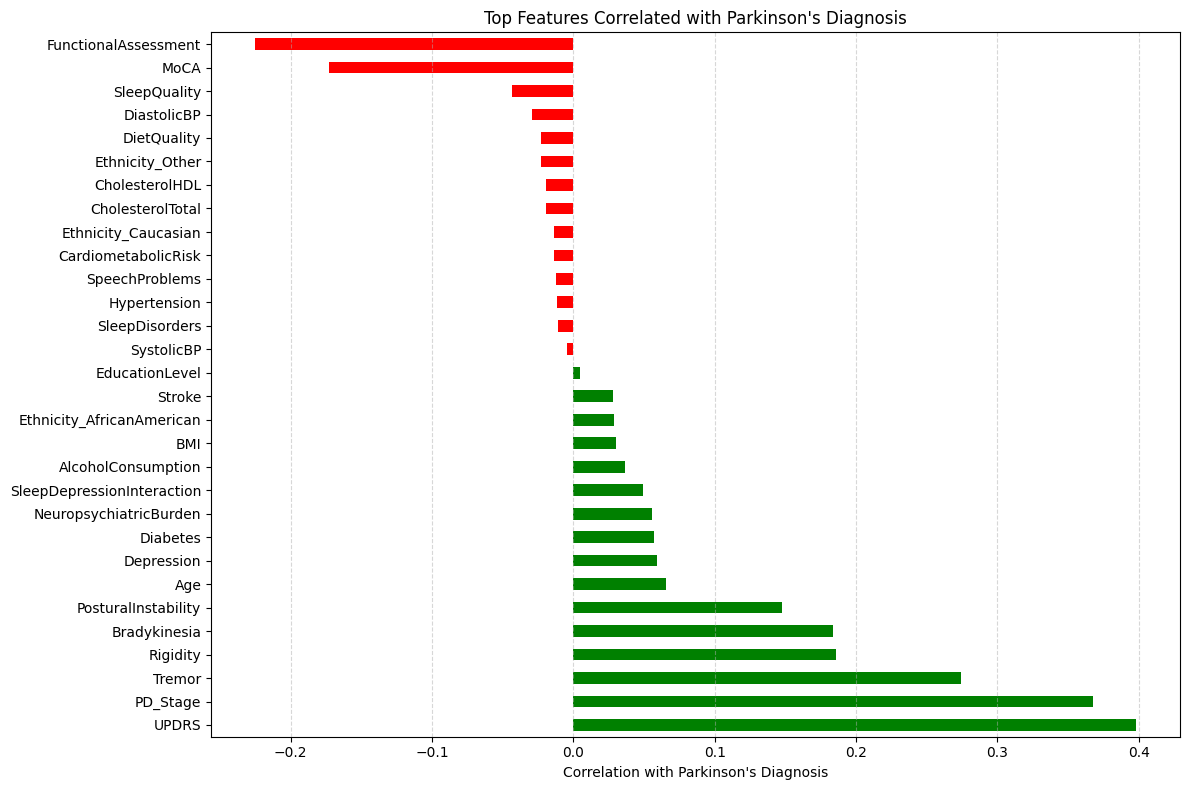

In [90]:
import matplotlib.pyplot as plt

# Select the top 15 positively and negatively correlated features
top_positive = correlation_with_diagnosis.head(15)
top_negative = correlation_with_diagnosis.tail(15)
top_features = pd.concat([top_positive, top_negative])

# Plot
plt.figure(figsize=(12, 8))
top_features.plot(kind='barh', color=['green' if x > 0 else 'red' for x in top_features])
plt.xlabel('Correlation with Parkinson\'s Diagnosis')
plt.title('Top Features Correlated with Parkinson\'s Diagnosis')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


####e. Heatmap of Lifestyle Factors vs. Parkinson’s Symptoms

To better understand the potential influence of modifiable lifestyle factors on PD symptom expression, we create a heatmap showing correlations between key lifestyle variables and core PD symptoms.

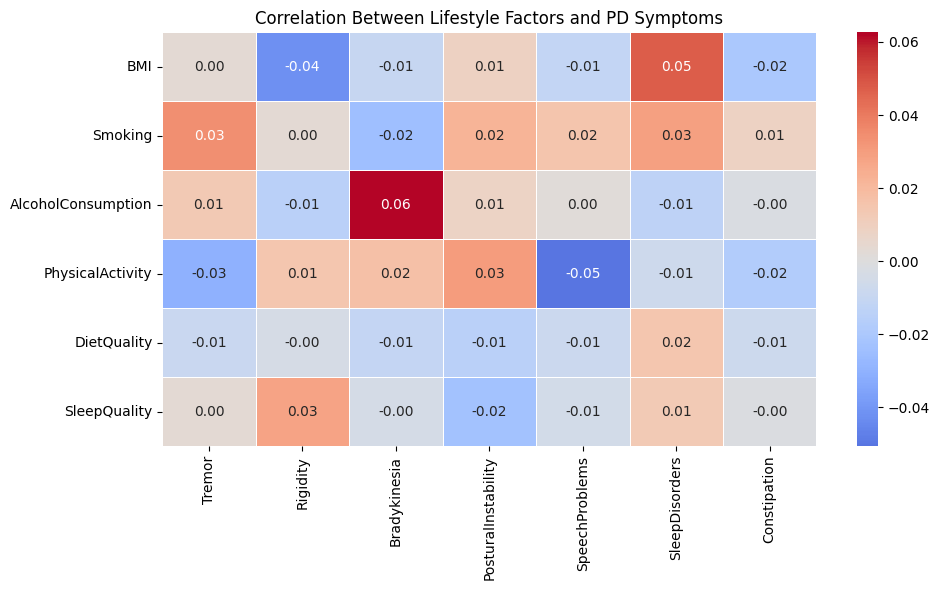

In [91]:
import seaborn as sns


lifestyle_vars = ['BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity',
                  'DietQuality', 'SleepQuality']
symptom_vars = ['Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability',
                'SpeechProblems', 'SleepDisorders', 'Constipation']


heatmap_data = df[lifestyle_vars + symptom_vars].corr().loc[lifestyle_vars, symptom_vars]


plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5)
plt.title('Correlation Between Lifestyle Factors and PD Symptoms')
plt.tight_layout()
plt.show()


The analysis above revealed generally weak linear associations across the board. The highest observed correlation was 0.06 between alcohol consumption and bradykinesia.

###4. Machine Learning



####a. Building a Random Forest Classifier
In this section, we:
- Train a Random Forest Classifier to predict Parkinson’s diagnosis using the engineered dataset. We're employing a Random Forest Classifier as the primary machine learning model due to its robustness. It also offers the benefit of interpretability through feature importance scores.
- Evaluate the model using accuracy metrics like precision, recall, and F1-score.
- Generate and display a confusion matrix.
- Plot the ROC Curve to visualize the classifier’s ability to distinguish between positive and negative classes.

This step helps assess how well our model distinguishes between patients with and without Parkinson’s Disease before exploring more complex combinations of features or tuning.


Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.48      0.59       150
           1       0.76      0.92      0.83       271

    accuracy                           0.76       421
   macro avg       0.76      0.70      0.71       421
weighted avg       0.76      0.76      0.74       421

Confusion Matrix:
 [[ 72  78]
 [ 23 248]]
ROC AUC Score: 0.7489298892988929


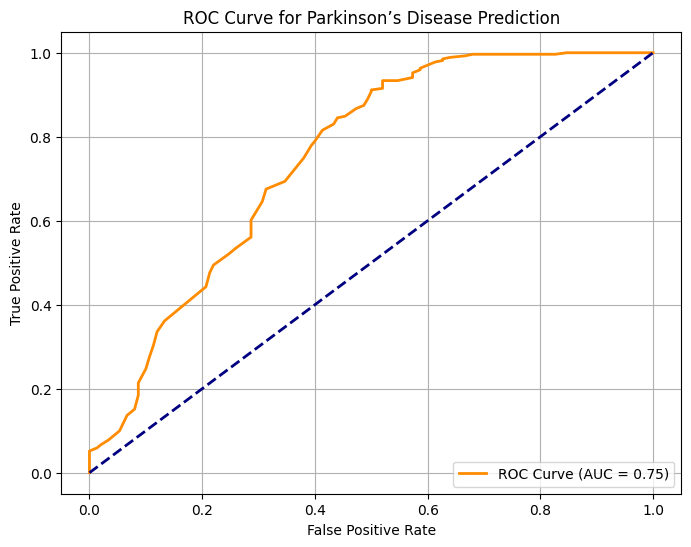

In [92]:
#initializing an empty list to collect model results
model_results = []


#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

#defining features (X) and target variable (y)
X = df.drop(columns=['Diagnosis', 'UPDRS', 'PD_Stage'])
y = df['Diagnosis']

#splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#training a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

#predicting on the test set
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

#evaluating the model's performance
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

#plotting the ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Parkinson’s Disease Prediction')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


roc_auc = roc_auc_score(y_test, y_prob)
model_results.append({
    'Model': 'Random Forest (All Features)',
    'ROC AUC': roc_auc
})

Results from confusion matrix:

- True Positives (TP): 248

- True Negatives (TN): 72

- False Positives (FP): 78 (healthy wrongly predicted as PD)

- False Negatives (FN): 23 (PD missed)

This confusion matrix reinforces that the model is more likely to err on the safe side by catching most PD cases.

#### b. Subgroup Analysis: Predictive Power of Feature Groups

To better understand which types of patient data are most predictive of early Parkinson's Disease, we conducted a series of classification experiments using Random Forest models trained on different feature subsets. These subsets were organized into clinically meaningful groups:

1. Demographic & Lifestyle Factors  
2. Medical History / Risk of Disease  
3. Cardiometabolic Factors  
4. Motor Symptoms  
5. Non-Motor Symptoms  

For each group, we:
- Trained a Random Forest classifier
- Evaluated performance using accuracy, precision, recall, F1-score, and ROC AUC
- Compared results to identify the most predictive feature category


##### 1. Demographic & Lifestyle Factors

This group includes baseline characteristics like age, gender, ethnicity, and lifestyle-related variables such as BMI, smoking status, alcohol use, and sleep quality. These factors are relevant in studying early signs or risks of chronic conditions like Parkinson's.


In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


demo_life_features = [
    'Age', 'Gender', 'Ethnicity_Caucasian', 'Ethnicity_AfricanAmerican',
    'Ethnicity_Asian', 'Ethnicity_Other', 'EducationLevel',
    'Smoking', 'AlcoholConsumption', 'PhysicalActivity',
    'BMI', 'DietQuality', 'SleepQuality'
]


X = df[demo_life_features]
y = df['Diagnosis']

# splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# training model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# evaluating
y_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))


roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
model_results.append({
    'Model': 'Demographic & Lifestyle Factors',
    'ROC AUC': roc_auc
})


Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.16      0.22       150
           1       0.65      0.85      0.74       271

    accuracy                           0.61       421
   macro avg       0.51      0.51      0.48       421
weighted avg       0.55      0.61      0.55       421

Confusion Matrix:
[[ 24 126]
 [ 40 231]]
ROC AUC Score: 0.5114514145141452


##### 2. Medical History / Risk of Disease

This group captures prior health history and comorbidities that may contribute to Parkinson’s risk. These include depression, stroke, and a family history of Parkinson’s.


In [94]:
medical_history_features = [
    'FamilyHistoryParkinsons', 'TraumaticBrainInjury', 'Depression',
    'Hypertension', 'Diabetes', 'Stroke'
]

X = df[medical_history_features]
y = df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))


roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
model_results.append({
    'Model': 'Medical History / Risk of Disease',
    'ROC AUC': roc_auc
})

Classification Report:
              precision    recall  f1-score   support

           0       0.19      0.02      0.04       150
           1       0.64      0.95      0.76       271

    accuracy                           0.62       421
   macro avg       0.41      0.49      0.40       421
weighted avg       0.48      0.62      0.50       421

Confusion Matrix:
[[  3 147]
 [ 13 258]]
ROC AUC Score: 0.5349692496924969


##### 3. Cardiometabolic Factors

These variables reflect the patient’s metabolic and cardiovascular health, which may influence neurodegenerative risk. This group includes blood pressure and various cholesterol markers.


In [95]:
cardiometabolic_features = [
    'SystolicBP', 'DiastolicBP', 'CholesterolTotal',
    'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides'
]

X = df[cardiometabolic_features]
y = df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))


roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
model_results.append({
    'Model': 'Cardiometabolic Factors',
    'ROC AUC': roc_auc
})

Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.13      0.19       150
           1       0.64      0.84      0.72       271

    accuracy                           0.59       421
   macro avg       0.47      0.49      0.45       421
weighted avg       0.52      0.59      0.53       421

Confusion Matrix:
[[ 20 130]
 [ 44 227]]
ROC AUC Score: 0.5134440344403444


##### 4. Motor Symptoms

Motor symptoms are core diagnostic criteria for Parkinson’s Disease. This set includes classic movement-related issues such as tremor, rigidity, and postural instability.


In [96]:
motor_symptom_features = [
    'Tremor', 'Rigidity', 'Bradykinesia',
    'PosturalInstability', 'SpeechProblems'
]

X = df[motor_symptom_features]
y = df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))


roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
model_results.append({
    'Model': 'Motor Symptoms',
    'ROC AUC': roc_auc
})

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.45      0.52       150
           1       0.73      0.83      0.78       271

    accuracy                           0.70       421
   macro avg       0.66      0.64      0.65       421
weighted avg       0.68      0.70      0.68       421

Confusion Matrix:
[[ 68  82]
 [ 46 225]]
ROC AUC Score: 0.6875522755227552


##### 5. Non-Motor Symptoms

Parkinson’s can also present with non-motor symptoms such as cognitive decline, sleep disturbances, and gastrointestinal issues. This feature set explores their diagnostic relevance.


In [97]:
non_motor_features = [
    'Constipation', 'SleepDisorders', 'SpeechProblems',
    'MoCA', 'FunctionalAssessment'
]

X = df[non_motor_features]
y = df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))


roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
model_results.append({
    'Model': 'Non-Motor Symptoms',
    'ROC AUC': roc_auc
})

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.42      0.44       150
           1       0.70      0.73      0.71       271

    accuracy                           0.62       421
   macro avg       0.58      0.58      0.58       421
weighted avg       0.61      0.62      0.62       421

Confusion Matrix:
[[ 63  87]
 [ 72 199]]
ROC AUC Score: 0.6038007380073802


**Note: UPDRS was removed from this category, but when it was included the ROC score was way higher (0.830344)**

### Model Performance Summary



####a. Summary Table

The table below summarizes the ROC AUC scores of all models tested so far, allowing for quick comparison of predictive performance across different feature combinations.

In [98]:

import pandas as pd
results_df = pd.DataFrame(model_results)

#sorting by ROC AUC score
results_df = results_df.sort_values(by='ROC AUC', ascending=False)


results_df.reset_index(drop=True, inplace=True)
results_df


,Model,ROC AUC
0,Random Forest (All Features),0.748930
1,Motor Symptoms,0.687552
2,Non-Motor Symptoms,0.603801
3,Medical History / Risk of Disease,0.534969
4,Cardiometabolic Factors,0.513444
5,Demographic & Lifestyle Factors,0.511451


#### b. Bar plot of ROC Scores

This bar plot compares the predictive power of different feature groupings based on their ROC AUC scores. Higher scores indicate stronger discriminatory ability between Parkinson’s and non-Parkinson’s cases. As shown, non-motor symptoms are especially valuable in early detection.

/tmp/ipython-input-99-4202252652.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=model_results_df, x='ROC AUC', y='Model', palette='viridis')


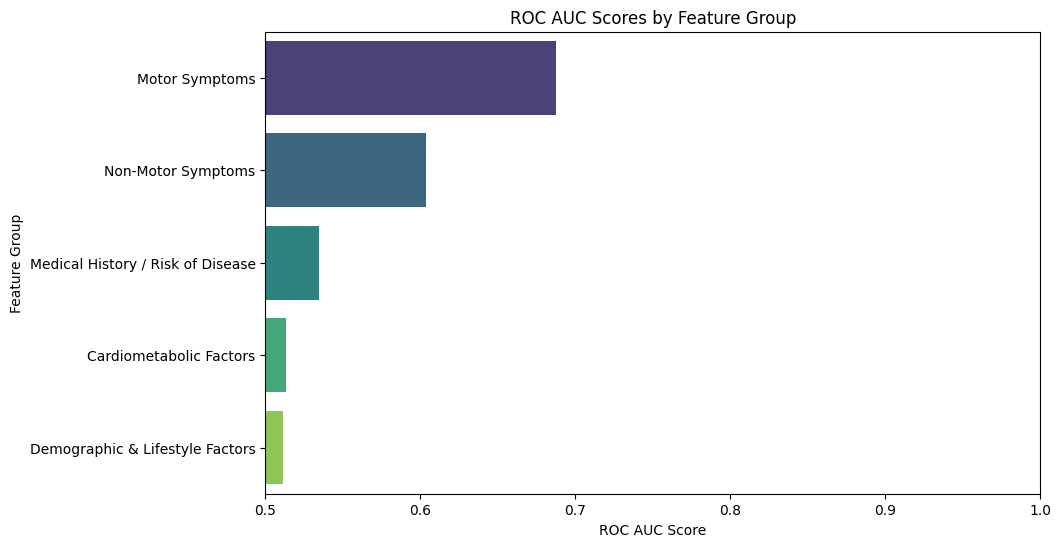

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

model_results_df = pd.DataFrame([

    {'Model': 'Motor Symptoms', 'ROC AUC': 0.687552},
    {'Model': 'Non-Motor Symptoms', 'ROC AUC': 0.603801},
    {'Model': 'Medical History / Risk of Disease', 'ROC AUC': 0.534969},
    {'Model': 'Cardiometabolic Factors', 'ROC AUC': 0.513444},
    {'Model': 'Demographic & Lifestyle Factors', 'ROC AUC': 0.511451}
])


plt.figure(figsize=(10, 6))
sns.barplot(data=model_results_df, x='ROC AUC', y='Model', palette='viridis')
plt.title('ROC AUC Scores by Feature Group')
plt.xlabel('ROC AUC Score')
plt.ylabel('Feature Group')
plt.xlim(0.5, 1.0)
plt.show()
